# Spam Message Classification

# 1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/spam.tsv', sep='\t')

In [3]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna() # missing value 값 확인 하기(널값 확인)

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [6]:
df.isna().sum() # our data is complete in the sense that there is no missing value existing of it.

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [9]:
df['label'].value_counts()/ (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [12]:
ham.shape, spam.shape

((4825, 4), (747, 4))

# 무작위 샘플 추출을 위한 sample 메서드

# 참고사이트-[https://kongdols-room.tistory.com/125](https://kongdols-room.tistory.com/125)



In [13]:
ham = ham.sample(spam.shape[0]) #747행 랜덤으로 추출함

In [14]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [15]:
data = ham.append(spam, ignore_index=True) # ham 데이터 + spam 데이터 
#ignore_index=False,  # False: 기존 index 유지, True: 기존 index 무시



In [16]:
data.shape

(1494, 4)

In [17]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [18]:
data.head()

,label,message,length,punct
0,ham,Yo im right by yo work,22,0
1,ham,"Yes..but they said its IT.,",27,4
2,ham,First has she gained more than &lt;#&gt; kg s...,191,7
3,ham,"Best line said in Love: . ""I will wait till th...",119,8
4,ham,Which is weird because I know I had it at one ...,51,0


# hist()
bins 은 막대의 갯수 /클수록 더 정확한 그래프 볼수 있다

# 참고사이트 - [https://seong6496.tistory.com/128](https://seong6496.tistory.com/128)

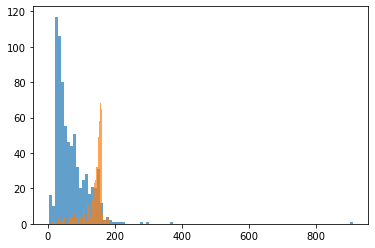

In [19]:
# ham 레이블에서 length 와 spam 레이블에서 length를 보여줌
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

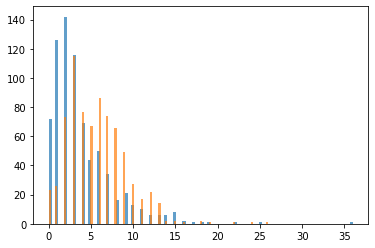

In [20]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [21]:
data

,label,message,length,punct
0,ham,Yo im right by yo work,22,0
1,ham,"Yes..but they said its IT.,",27,4
2,ham,First has she gained more than &lt;#&gt; kg s...,191,7
3,ham,"Best line said in Love: . ""I will wait till th...",119,8
4,ham,Which is weird because I know I had it at one ...,51,0
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

- 옵션 값 설명

test_size: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.

shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.

stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.

In [24]:
1494 * 0.3

448.2

In [25]:
X_train.shape

(1045,)

In [26]:
X_test.shape

(449,)

# 2) Building the Model (Random Forest)

# Random Forest(랜덤 포레스트) 이란?


# 참고사이트 - [https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/](https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/)


Decision Tree는 overfitting될 가능성이 높다는 약점을 가지고 있습니다. 가지치기를 통해 트리의 최대 높이를 설정해 줄 수 있지만 이로써는 overfitting을 충분히 해결할 수 없습니다. 그러므로 좀더 일반화된 트리를 만드는 방법을 생각해야합니다. 이는 Random Forest(랜덤 포레스트)의 기원이 되는 아이디어입니다. Random forest는 ensemble(앙상블) machine learning 모델입니다. 여러개의 decision tree를 형성하고 새로운 데이터 포인트를 각 트리에 동시에 통과시키며, 각 트리가 분류한 결과에서 투표를 실시하여 가장 많이 득표한 결과를 최종 분류 결과로 선택합니다. 랜덤 포레스트가 생성한 일부 트리는 overfitting될 수 있지만, 많은 수의 트리를 생성함으로써 overfitting이 예측하는데 있어 큰 영향을 미치지 못 하도록 예방합니다.

# TfidfVectorizer은 무엇일까?

# 참고사이트 - [https://chan-lab.tistory.com/27](https://chan-lab.tistory.com/27)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [28]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

# Pipeline을 왜 사용하는 것일까?

파이프라인을 사용하면 데이터 사전 처리 및 분류의 모든 단계를 포함하는 단일 개체를 만들 수 있다.

 

- train과 test 데이터 손실을 피할 수 있다.

- 교차 검증 및 기타 모델 선택 유형을 쉽게 만든다.

- 재현성 증가

In [29]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# 3) Predicting the results (Random Forest)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', '

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [33]:
accuracy_score(y_test, y_pred)

0.9376391982182628

In [34]:
0.9465478841870824 * 449

425.0

# confusion matrix은 무엇일까?

# 참고사이트 - [http://www.gisdeveloper.co.kr/?p=9932](http://www.gisdeveloper.co.kr/?p=9932)

# 예시 그림

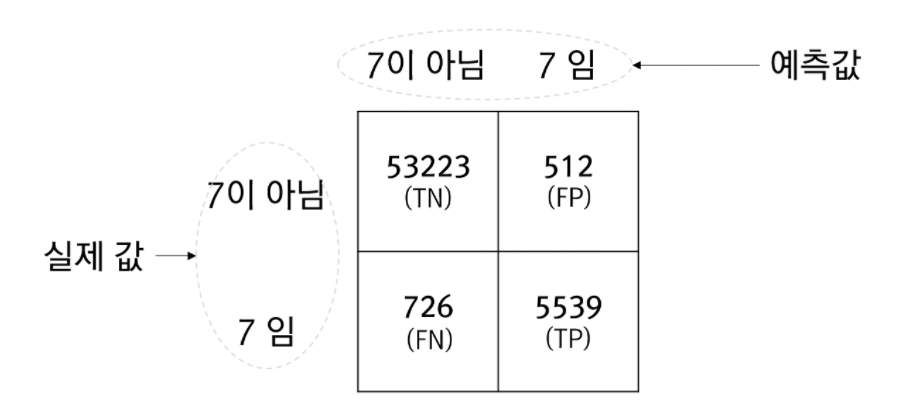

In [35]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211105_140442_1.png")

- 위의 그림에서 표에 담긴 4개의 값은 발생횟수입니다. TN과 TP의 값은 옳바르게 예측한 횟수이고 FN과 FP는 잘못 예측한 횟수입니다. 즉, FN과 FP가 0일때 모델은 완벽하다는 의미입니다.

- 이제 위의 혼돈행렬에서 정밀도(Precision)와 재현률(Recall), F1점수에 대한 수식은 다음과 같습니다.

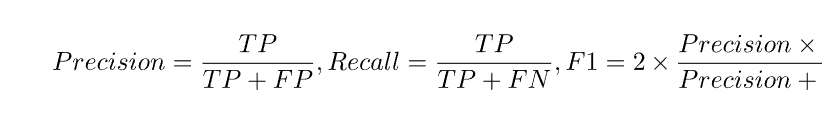

In [36]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211105_140442_2.png")

- 정밀도와 재현률이 서로 상반관계에 있습니다. 즉, 정밀도가 높으면 재현률이 떨어지며 재현률이 높아지면 정밀도가 떨어지는 경향이 있습니다. F1은 이런 상반관계에 있는 정밀도와 재현률을 묶어 평가하고자 하는 지표입니다.

In [37]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 27, 195]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       227
        spam       0.99      0.88      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449




# 4) Building the Model (SVM)


C-서포트 벡터 분류.


서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

결국 이 결정 경계라는 걸 어떻게 정의하고 계산하는지 이해하는 게 중요하다는 뜻이다.

일단 예시를 보자.

만약 데이터에 2개 속성(feature)만 있다면 결정 경계는 이렇게 간단한 선 형태가 될 거다.

# 참고사이트 -[https://hleecaster.com/ml-svm-concept/](https://hleecaster.com/ml-svm-concept/)

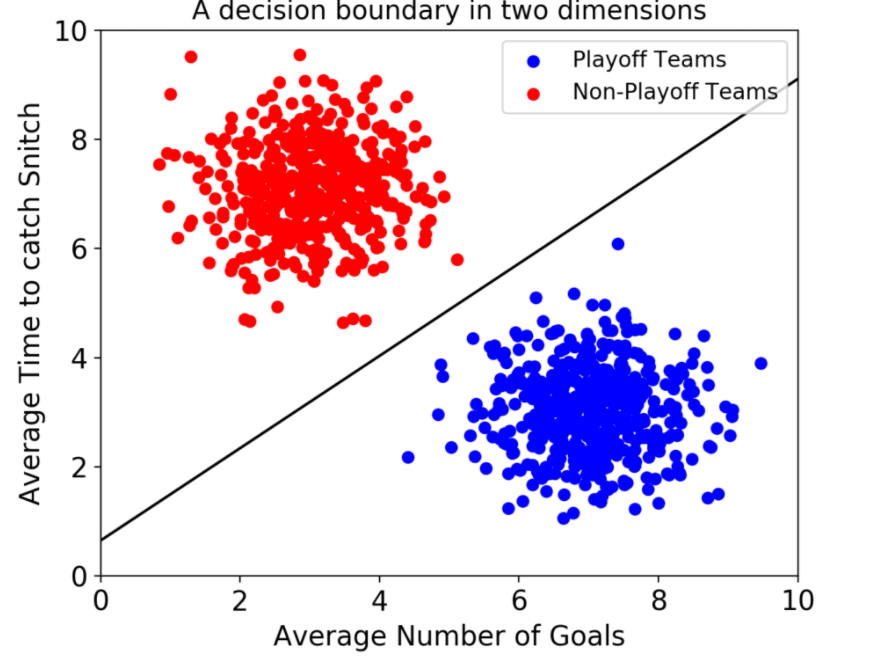

In [39]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211105_142414_1.png")

In [40]:
from sklearn.svm import SVC

In [41]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

gamma{‘scale’, ‘auto’} or float, default=’scale’

Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

- if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

- if ‘auto’, uses 1 / n_features.

In [42]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# 5) Predicting the results (SVM)

In [43]:
y_pred = svm.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.9599109131403119

In [45]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 16, 206]], dtype=int64)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# 텍스트 데이터으로 spam인지 아닌지 구별하기 

In [47]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [48]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [49]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']


In [50]:
text4 = ['No-one wants their mobile phone bombarded with spam texts']

In [51]:
print(classifier.predict(text4))

['ham']
